In [665]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')
import warnings
warnings.filterwarnings('ignore')
import sklearn as sk
%matplotlib inline

In [666]:
dataset_train = pd.read_csv ('train.csv')
dataset_test = pd.read_csv('test.csv')

In [667]:
dataset_train

,id,transaction time,current bank amount,last bank amount,time taken (seconds),most recent bank amount,account type,marital_status,age,occupation,credit card type,account source verification,transaction source method,account destination verification,fradulent
0,acus0,2016-10-05T01:44:58,43671,1151263,2299,348764,saving,married,46,musician,master,True,False,True,0
1,acus1,2015-01-14T15:05:07,7442,1062843,4553,225114,current,single,64,accounting,master,True,False,False,0
2,acus2,2016-10-28T13:44:58,40102,48042,1493,420486,current,married,41,farmer,master,True,True,True,0
3,acus3,2016-11-20T15:05:32,61024,1441746,544,239663,current,unknown,66,clergy,master,True,True,True,0
4,acus4,2015-09-01T16:11:57,22867,510656,4581,432337,current,married,78,accounting,verve,False,False,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10488,bcus2988,2014-12-04T17:38:16,40426,1485894,737,288940,saving,married,74,banking,master,True,True,False,1
10489,bcus2989,2014-10-02T01:52:43,22276,361919,3125,292788,saving,married,71,doctor,master,True,True,False,0
10490,bcus2990,2015-07-03T04:33:19,40761,243638,2758,116256,current,unknown,59,banking,master,False,False,True,0
10491,bcus2991,2014-10-08T12:55:01,61575,534159,854,394715,current,single,42,banking,verve,True,True,False,0


In [668]:
dataset_test

,id,transaction time,current bank amount,last bank amount,time taken (seconds),most recent bank amount,account type,marital_status,age,occupation,credit card type,account source verification,transaction source method,account destination verification
0,bcus2993,2016-06-28T12:51:43,88677,1059697,3033,29964,current,unknown,78,accounting,verve,True,True,False
1,bcus2994,2015-12-16T18:04:03,85737,434908,3025,354835,current,single,38,farmer,master,True,False,False
2,bcus2995,2016-10-15T04:06:55,14611,1287631,2414,395445,current,unknown,47,banking,master,True,False,False
3,bcus2996,2014-03-15T04:40:45,53130,61604,1228,204872,current,single,74,clergy,master,False,False,True
4,bcus2997,2015-05-25T05:09:33,20643,1143031,1031,207262,current,married,72,lawyer,master,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4502,bcus7495,2016-07-17T17:32:10,4934,784300,1214,256774,current,married,37,lecturer,master,True,False,False
4503,bcus7496,2016-09-28T11:03:00,44428,1086507,2235,379427,current,married,38,accounting,master,True,False,False
4504,bcus7497,2015-08-22T22:19:44,22311,9605,3818,447750,current,married,66,clergy,master,True,True,False
4505,bcus7498,2014-10-21T13:21:38,89352,285156,3649,161042,current,unknown,68,musician,master,False,False,False


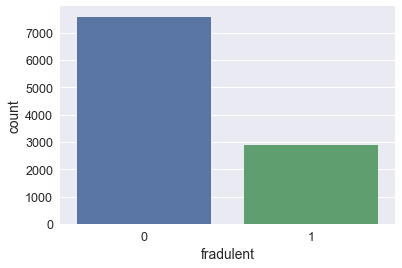

In [669]:
sns.countplot(dataset_train['fradulent'])

In [670]:
dataset_train.info()
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10493 entries, 0 to 10492
Data columns (total 15 columns):
id                                  10493 non-null object
transaction time                    10493 non-null object
current bank amount                 10493 non-null int64
last bank amount                    10493 non-null int64
time taken (seconds)                10493 non-null int64
most recent bank amount             10493 non-null int64
account type                        10493 non-null object
marital_status                      10493 non-null object
age                                 10493 non-null int64
occupation                          10493 non-null object
credit card type                    10493 non-null object
account source verification         10493 non-null bool
transaction source method           10493 non-null bool
account destination verification    10493 non-null bool
fradulent                           10493 non-null int64
dtypes: bool(3), int64(6), object

In [671]:
dataset_train['fradulent'].describe()

count    10493.000000
mean         0.276661
std          0.447369
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: fradulent, dtype: float64

In [672]:
#skewness and kurtosis
print("Skewness: %f" % dataset_train['fradulent'].skew())
print("Kurtosis: %f" % dataset_train['fradulent'].kurt())

Skewness: 0.998648
Kurtosis: -1.002892


# correlation matrix

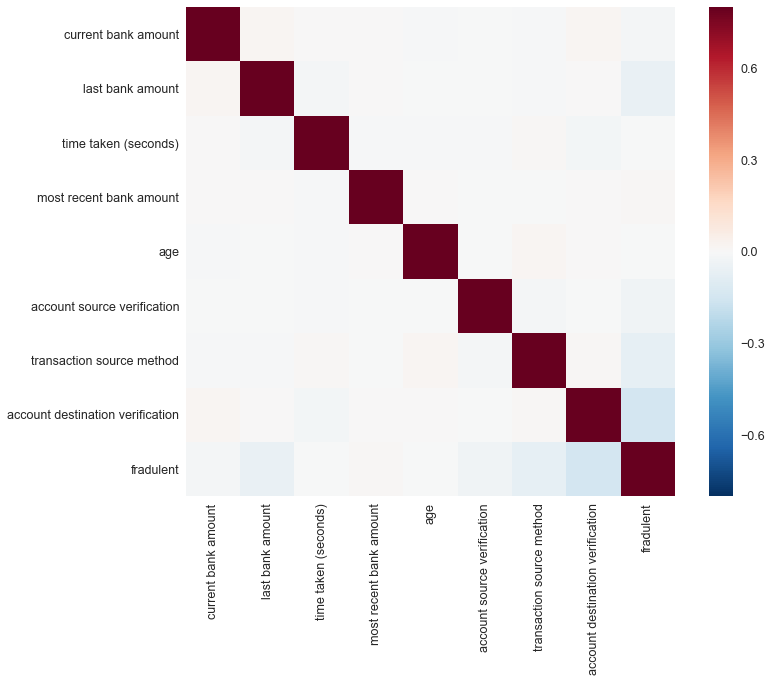

In [673]:
corrmat = dataset_train.corr()
f, ax = plt.subplots (figsize=(12,9))
sns.heatmap(corrmat,vmax=.8, square= True)

<function matplotlib.pyplot.show>

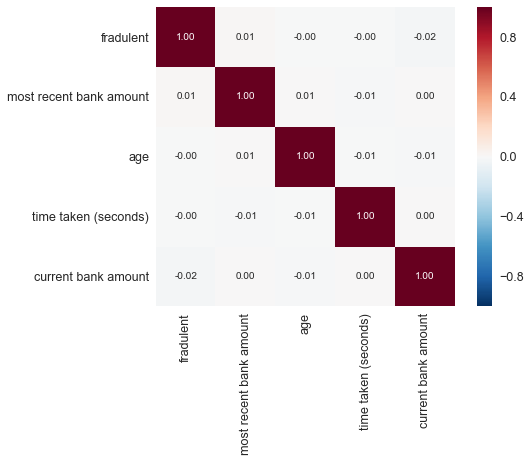

In [674]:
k=5 #number of variables for heatmap
cols=corrmat.nlargest(k, 'fradulent')['fradulent'].index
cm=np.corrcoef(dataset_train[cols].values.T)
sns.set(font_scale=1.25)
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)


plt.show

In [675]:
dataset_test.columns

Index(['id', 'transaction time', 'current bank amount', 'last bank amount',
       'time taken (seconds)', 'most recent bank amount', 'account type',
       'marital_status', 'age', 'occupation', 'credit card type',
       'account source verification', 'transaction source method',
       'account destination verification'],
      dtype='object')

In [676]:
dataset_train.columns

Index(['id', 'transaction time', 'current bank amount', 'last bank amount',
       'time taken (seconds)', 'most recent bank amount', 'account type',
       'marital_status', 'age', 'occupation', 'credit card type',
       'account source verification', 'transaction source method',
       'account destination verification', 'fradulent'],
      dtype='object')

# DEALING WITH integers

<function matplotlib.pyplot.show>

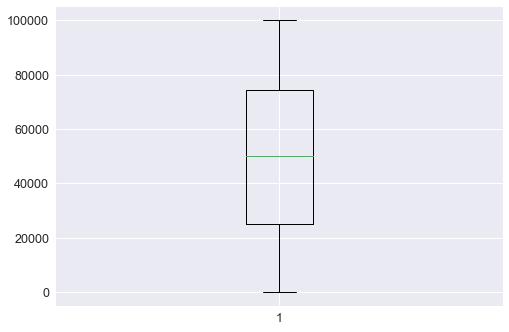

In [677]:
plt.boxplot(dataset_train['current bank amount'])
#ataset_train['current bank amount'][dataset_train['urrent bank amount'
plt.show

<function matplotlib.pyplot.show>

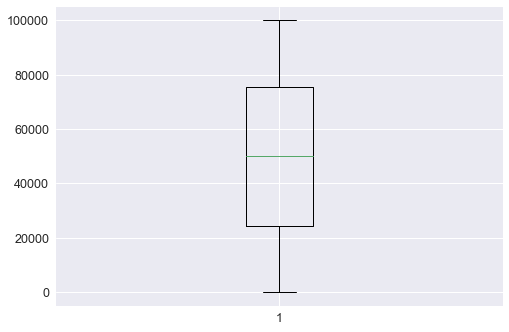

In [678]:
plt.boxplot(dataset_test['current bank amount'])
#ataset_train['current bank amount'][dataset_train['urrent bank amount'
plt.show

<function matplotlib.pyplot.show>

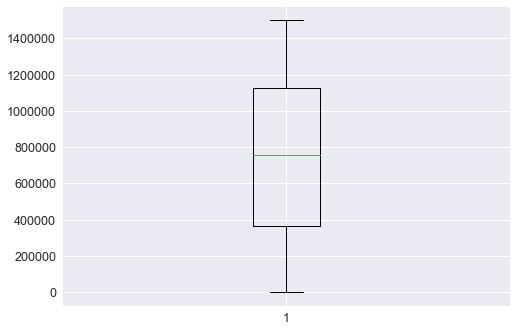

In [679]:
plt.boxplot(dataset_test['last bank amount'])
dataset_test['last bank amount'][dataset_test['last bank amount']>1400000 ]=1400000
plt.show

<function matplotlib.pyplot.show>

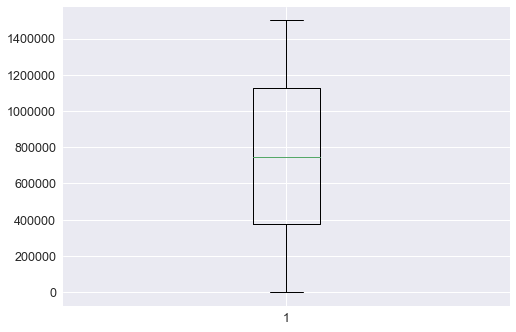

In [680]:
plt.boxplot(dataset_train['last bank amount'])
dataset_train['last bank amount'][dataset_train['last bank amount']>1400000 ]=1400000
plt.show

<function matplotlib.pyplot.show>

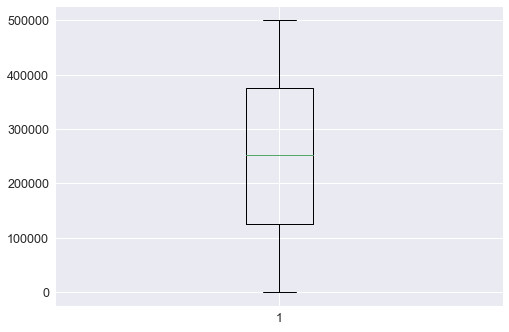

In [681]:
plt.boxplot(dataset_train['most recent bank amount'])
plt.show

<function matplotlib.pyplot.show>

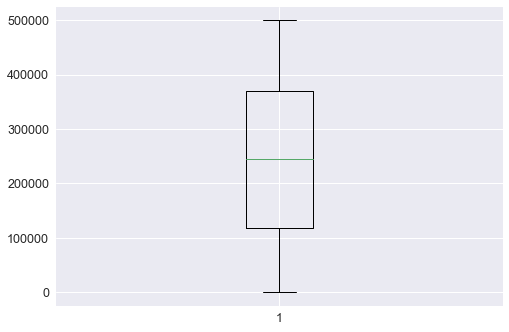

In [682]:
plt.boxplot(dataset_test['most recent bank amount'])
plt.show

In [683]:
dataset_train['time taken (seconds)']

0        2299
1        4553
2        1493
3         544
4        4581
         ... 
10488     737
10489    3125
10490    2758
10491     854
10492    3041
Name: time taken (seconds), Length: 10493, dtype: int64

In [684]:
dataset_test['time taken (days)'] = dataset_test['time taken (seconds)']/86400
dataset_test.drop('time taken (seconds)', axis = 1, inplace = True)

In [685]:
dataset_train['time taken (days)'] = dataset_train['time taken (seconds)']/86400
dataset_train.drop('time taken (seconds)', axis = 1, inplace = True)

In [686]:
dataset_train['time taken (days)'].describe()

count    10493.000000
mean         0.029035
std          0.016584
min          0.000046
25%          0.014838
50%          0.029167
75%          0.042940
max          0.057859
Name: time taken (days), dtype: float64

<function matplotlib.pyplot.show>

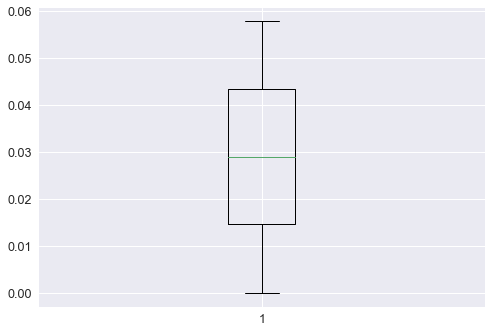

In [687]:
plt.boxplot(dataset_test['time taken (days)'])
plt.show

<function matplotlib.pyplot.show>

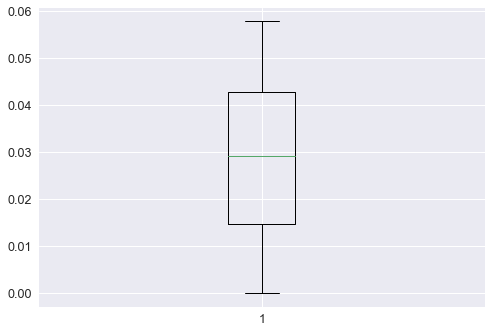

In [688]:
plt.boxplot(dataset_train['time taken (days)'])
plt.show

<function matplotlib.pyplot.show>

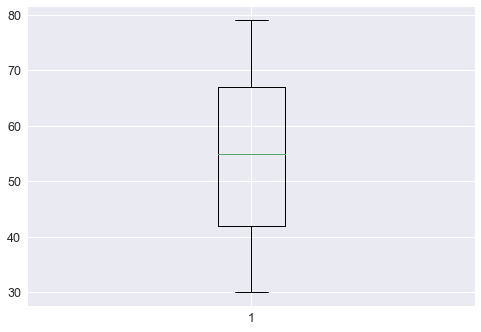

In [689]:
plt.boxplot(dataset_train['age'])
plt.show

<function matplotlib.pyplot.show>

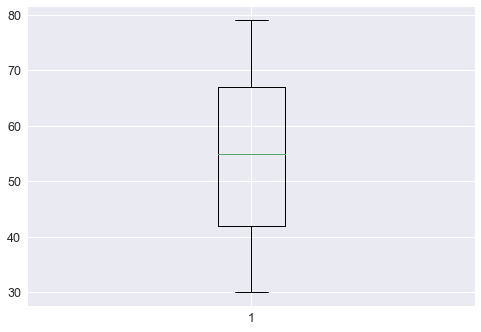

In [690]:
plt.boxplot(dataset_test['age'])
plt.show

In [691]:
import datetime

In [692]:
dataset_train['transaction time']= pd.to_datetime(dataset_train['transaction time'])

In [693]:
dataset_test['transaction time']= pd.to_datetime(dataset_test['transaction time'])

In [694]:
dataset_train['time_in day'] = dataset_train['transaction time'].dt.hour
dataset_train[['transaction time','time_in day']].head()


#dataset_train['is_weekend'] = np.where(dataset_train['dayofweek_name'].isin(['Sunday','Saturday']),1,1)
#dataset_train[['transaction time','is_weekend']].head()

,transaction time,time_in day
0,2016-10-05 01:44:58,1
1,2015-01-14 15:05:07,15
2,2016-10-28 13:44:58,13
3,2016-11-20 15:05:32,15
4,2015-09-01 16:11:57,16


In [695]:
dataset_test['time_in day'] = dataset_test['transaction time'].dt.hour
dataset_test[['transaction time','time_in day']].head()

,transaction time,time_in day
0,2016-06-28 12:51:43,12
1,2015-12-16 18:04:03,18
2,2016-10-15 04:06:55,4
3,2014-03-15 04:40:45,4
4,2015-05-25 05:09:33,5


In [696]:
dataset_train.drop('transaction time', axis = 1, inplace = True)

In [697]:
dataset_test.drop('transaction time', axis = 1, inplace = True)

In [698]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10493 entries, 0 to 10492
Data columns (total 15 columns):
id                                  10493 non-null object
current bank amount                 10493 non-null int64
last bank amount                    10493 non-null int64
most recent bank amount             10493 non-null int64
account type                        10493 non-null object
marital_status                      10493 non-null object
age                                 10493 non-null int64
occupation                          10493 non-null object
credit card type                    10493 non-null object
account source verification         10493 non-null bool
transaction source method           10493 non-null bool
account destination verification    10493 non-null bool
fradulent                           10493 non-null int64
time taken (days)                   10493 non-null float64
time_in day                         10493 non-null int64
dtypes: bool(3), float64(1), int

In [699]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4507 entries, 0 to 4506
Data columns (total 14 columns):
id                                  4507 non-null object
current bank amount                 4507 non-null int64
last bank amount                    4507 non-null int64
most recent bank amount             4507 non-null int64
account type                        4507 non-null object
marital_status                      4507 non-null object
age                                 4507 non-null int64
occupation                          4507 non-null object
credit card type                    4507 non-null object
account source verification         4507 non-null bool
transaction source method           4507 non-null bool
account destination verification    4507 non-null bool
time taken (days)                   4507 non-null float64
time_in day                         4507 non-null int64
dtypes: bool(3), float64(1), int64(5), object(5)
memory usage: 400.6+ KB


#  categorical features

In [700]:
dataset_train.drop('id', axis = 1, inplace = True)

In [701]:
dataset_test.drop('id', axis = 1, inplace = True)

In [702]:
dataset_train['account type'].value_counts()

current    8984
saving     1509
Name: account type, dtype: int64

In [703]:
dataset_test['account type'].value_counts()

current    3807
saving      700
Name: account type, dtype: int64

In [704]:
#using onehot encoding

dataset_train=pd.get_dummies(dataset_train,columns=['account type'])

In [705]:
#using onehot encoding

dataset_test=pd.get_dummies(dataset_test,columns=['account type'])

In [706]:
dataset_train['marital_status'].value_counts()

married    5270
single     3122
unknown    2101
Name: marital_status, dtype: int64

In [707]:
dataset_test['marital_status'].value_counts()

married    2229
single     1358
unknown     920
Name: marital_status, dtype: int64

#encoding the marital_status using label 

dataset_train['marital_status'][dataset_train['marital_status']=='single']=0
dataset_train['marital_status'][dataset_train['marital_status']=='unknown']=0

dataset_train['marital_status'][dataset_train['marital_status']=='married']=1


In [708]:
#using onehot encoding

dataset_train=pd.get_dummies(dataset_train,columns=['marital_status'])

#encoding the marital_status using label 

dataset_test['marital_status'][dataset_test['marital_status']=='single']=0
dataset_test['marital_status'][dataset_test['marital_status']=='unknown']=0

dataset_test['marital_status'][dataset_test['marital_status']=='married']=1


In [709]:
#using onehot encoding

dataset_test=pd.get_dummies(dataset_test,columns=['marital_status'])

In [710]:
dataset_train['occupation'].value_counts()

clergy        2601
accounting    2065
lecturer      1599
banking       1597
doctor        1120
farmer         551
lawyer         549
musician       411
Name: occupation, dtype: int64

In [711]:
dataset_test['occupation'].value_counts()

clergy        1149
accounting     940
lecturer       663
banking        609
doctor         465
lawyer         251
farmer         246
musician       184
Name: occupation, dtype: int64

#encoding the occupation using label 

dataset_train['occupation'][dataset_train['occupation']=='accounting']=0
dataset_train['occupation'][dataset_train['occupation']=='banking']=0
dataset_train['occupation'][dataset_train['occupation']=='musician']=0
dataset_train['occupation'][dataset_train['occupation']=='lawyer']=0

dataset_train['occupation'][dataset_train['occupation']=='doctor']=1
dataset_train['occupation'][dataset_train['occupation']=='farmer']=1
dataset_train['occupation'][dataset_train['occupation']=='clergy']=1
dataset_train['occupation'][dataset_train['occupation']=='lecturer']=1




#encoding the occupation using label 

dataset_test['occupation'][dataset_test['occupation']=='accounting']=0
dataset_test['occupation'][dataset_test['occupation']=='banking']=0
dataset_test['occupation'][dataset_test['occupation']=='musician']=0
dataset_test['occupation'][dataset_test['occupation']=='lawyer']=0

dataset_test['occupation'][dataset_test['occupation']=='doctor']=1
dataset_test['occupation'][dataset_test['occupation']=='farmer']=1
dataset_test['occupation'][dataset_test['occupation']=='clergy']=1
dataset_test['occupation'][dataset_test['occupation']=='lecturer']=1



In [712]:
#using onehot encoding

dataset_train=pd.get_dummies(dataset_train,columns=['occupation'])

In [713]:
#using onehot encoding

dataset_test=pd.get_dummies(dataset_test,columns=['occupation'])

dataset_test['credit card type'][dataset_test['credit card type']=='master']=0
dataset_test['credit card type'][dataset_test['credit card type']=='verve']=1

dataset_train['credit card type'][dataset_train['credit card type']=='master']=0
dataset_train['credit card type'][dataset_train['credit card type']=='verve']=1

In [714]:
#using onehot encoding

dataset_train=pd.get_dummies(dataset_train,columns=['credit card type'])

In [715]:
#using onehot encoding

dataset_test=pd.get_dummies(dataset_test,columns=['credit card type'])

In [716]:
dataset_train['account source verification'].value_counts()

True     8206
False    2287
Name: account source verification, dtype: int64

In [717]:
#using onehot encoding

dataset_train=pd.get_dummies(dataset_train,columns=['account source verification'])

In [718]:
#using onehot encoding

dataset_test=pd.get_dummies(dataset_test,columns=['account source verification'])

In [719]:
dataset_train['transaction source method'].value_counts()

True     5751
False    4742
Name: transaction source method, dtype: int64

In [720]:
#using onehot encoding

dataset_train=pd.get_dummies(dataset_train,columns=['transaction source method'])

In [721]:
#using onehot encoding

dataset_test=pd.get_dummies(dataset_test,columns=['transaction source method'])

In [722]:
dataset_train['account destination verification'].value_counts()

False    7710
True     2783
Name: account destination verification, dtype: int64

In [723]:
#using onehot encoding

dataset_train=pd.get_dummies(dataset_train,columns=['account destination verification'])

In [724]:
#using onehot encoding

dataset_test=pd.get_dummies(dataset_test,columns=['account destination verification'])

#  this is output label y (fradulent)

In [725]:
y = dataset_train['fradulent']

In [726]:
dataset_train=dataset_train.drop('fradulent',axis=1)

In [727]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10493 entries, 0 to 10492
Data columns (total 27 columns):
current bank amount                       10493 non-null int64
last bank amount                          10493 non-null int64
most recent bank amount                   10493 non-null int64
age                                       10493 non-null int64
time taken (days)                         10493 non-null float64
time_in day                               10493 non-null int64
account type_current                      10493 non-null uint8
account type_saving                       10493 non-null uint8
marital_status_married                    10493 non-null uint8
marital_status_single                     10493 non-null uint8
marital_status_unknown                    10493 non-null uint8
occupation_accounting                     10493 non-null uint8
occupation_banking                        10493 non-null uint8
occupation_clergy                         10493 non-null uint8
occupat

dataset_train['marital_status'] = dataset_train['marital_status'].astype('int')

In [729]:
#dataset_train['credit card type'] = dataset_train['credit card type'].astype('int')

In [731]:
#dataset_train['occupation'] = dataset_train['occupation'].astype('int')

# ML model using Logistic regression

In [732]:
from sklearn.preprocessing import StandardScaler

In [733]:
std = StandardScaler()

In [734]:
X=std.fit_transform(dataset_train)

In [735]:
X.shape, y.shape

((10493, 27), (10493,))

In [736]:
from sklearn.model_selection import train_test_split


x_train,x_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=42)

In [737]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((8394, 27), (8394,), (2099, 27), (2099,))

In [738]:
from sklearn.ensemble import RandomForestClassifier

In [739]:
y_train = y_train.astype('int')

In [740]:
lr = RandomForestClassifier(
)
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

0.9893971884679533

In [741]:
pred = lr.predict(x_test)
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix,precision_score, classification_report,auc

In [742]:
score = accuracy_score(y_test,pred)

In [743]:
print(score)

0.717008099094807


In [744]:
y_test = y_test.astype('int')

In [745]:
f1_score(y_test,pred)

0.35294117647058826

In [746]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.76      0.88      0.82      1520
          1       0.48      0.28      0.35       579

avg / total       0.68      0.72      0.69      2099



In [747]:
pred = lr.predict(dataset_test)

In [748]:
pred

array([1, 1, 1, ..., 1, 1, 0])

In [749]:
dataset = pd.read_csv('test.csv')

In [750]:
dict1 = {'id' : dataset['id'], 'fradulent' : pred}

In [751]:
df = pd.DataFrame(dict1)

In [752]:
df


,id,fradulent
0,bcus2993,1
1,bcus2994,1
2,bcus2995,1
3,bcus2996,1
4,bcus2997,0
...,...,...
4502,bcus7495,1
4503,bcus7496,1
4504,bcus7497,1
4505,bcus7498,1


In [753]:
df.to_csv('my_pred.csv',index=False)